In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp , log, log10

In [2]:
from math import exp

In [3]:
os.chdir('../dependencies/')
from logistic_regression import logistic_regression

In [25]:
def loss(f_x,y):
    if y == 1 : return y*log(abs(f_x))
    else : return (1-y)*log(abs(1-f_x))
    

In [26]:
def plot_graph(name,var):
    figure = graph.figure(figsize = (15,10))
    graph.ylabel(name)
    graph.xlabel("Iterations")
    graph.title(name)
    graph.plot(var,label=name)
    graph.legend()
    graph.grid(True)
    

In [27]:
def norm(vector):
    vector = [v**2 for v in vector]
    vector = float(sum(vector))
    vector = vector ** 0.5
    return vector

def sigmoid(x,w):
    f_x = 1/(1 + exp(-float(maths.matmul(w.T,x)))) 
    return f_x

def logit(f_x):
    if f_x == 1: return 0
    if f_x == 0: return 1
    else : return log(abs(f_x)/abs(1-f_x))

In [28]:
def create_confusion_matrix(y,y_hat):
    """ Creating the confusion matrix """

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == y_hat[i] == 1:
            tp = tp + 1
        elif y[i] == y_hat[i] == 0:
            tn = tn + 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn = fn + 1
        else :
            fp = fp + 1

    confusion_matrix = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
    print("Confusion Matrix : ",confusion_matrix)
    accuracy = round((confusion_matrix['tp']+confusion_matrix['tn'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)

    
    print('Accuracy : ', accuracy)
    print('Precision : ', precision)
    print('Senstivity : ', sensitivity)
    print('Specificity : ', specificity)
    
#     accuracy = find_accuracy()
#     precision = find_precision()
#     sensitivity = find_sensitivity()
#     specificity = find_specificity()
#     fscore = find_fscore()


def find_precision(show = True):
    """ Finding Precision """

    confusion_matrix = confusion_matrix
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    if show : print("Precision : ",precision,"%")
    return precision

def find_accuracy(show = True):
    """ Finding Accuracy """

    confusion_matrix = confusion_matrix
    accuracy = round((confusion_matrix['tp']+confusion_matrix['tn'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    if show : print("Accuracy : ",accuracy,"%")
    return accuracy

def find_sensitivity(show = True):
    """ Finding Sensivity """

    confusion_matrix = confusion_matrix
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    if show : print("Sensivity : ",sensitivity,"%")
    return sensitivity

def find_specificity(show = True):
    """ Finding Specificity """

    confusion_matrix = confusion_matrix
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)
    if show : print("Specificity : ",specificity,"%")
    return specificity

def find_fscore(show=True):
    """ Finding FScore """

    confusion_matrix = confusion_matrix
    f_score = round(2/((1/find_precision(False))+(1/find_sensitivity(False))),2)
    if show : print("F1 Score : ",f_score)
    return f_score        


In [29]:
filename = 'data1'
validation_perc = 0.7
training_perc = 0.8
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

In [30]:
log_reg = logistic_regression()
log_reg.load_data(filename)
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)
# log_reg.find_weights(alphas, number_of_iterations )
# log_reg.classify(df_test)

In [31]:
for col in df_validation.columns[1:-1] :
    maximum = max(df_validation[col])
    minimum = min(df_validation[col])
    diff = maximum - minimum
    
    df_validation[col] = (df_validation[col] - maximum) / diff
    df_test[col] = (df_test[col] - maximum) / diff
df_validation

,x0,x1,x2,y
29,1,-0.959184,-0.489796,1
30,1,-0.693878,-0.489796,1
144,1,-0.244898,-0.714286,0
85,1,-0.571429,-0.122449,1
40,1,-0.816327,-0.265306,1
...,...,...,...,...
65,1,-0.571429,-0.489796,1
23,1,-0.836735,-0.081633,1
161,1,-0.469388,-1.000000,0
79,1,-0.387755,-0.163265,1


In [32]:
maths.matmul(w_star.T,x)

matrix([[36.73954287]])

In [33]:
w_star.T@x

matrix([[36.73954287]])

In [52]:
X = df_validation.iloc[:,:-1].reset_index(drop=True)
Y = df_validation.iloc[:,-1].reset_index(drop=True)

w_star = maths.matrix(maths.random.rand(X.shape[1])).T

w_old = w_star + [1]

iteration_number = 1

epsilon = 1e-5
alpha = 0.1
norms = [1]
losses = []
cost = []
sigmoids = []
logits = []
weights = []

while norms[-1] > epsilon :
    w_old = w_star
    iteration_number = iteration_number + 1
    for i in range(len(X)):
        x = maths.matrix(X.iloc[i]).T
        y = Y.iloc[i]
        weights.append(w_star.T @ x)
        f_x = sigmoid(x,w_star)
        w_star = w_star - alpha * (y - f_x) * x

        norms.append(norm( w_star - w_old ))
        w_old = w_star

        sigmoids.append(f_x)
        losses.append(loss(f_x,y))
        
        logits.append(logit(f_x))
        
    cost.append(-sum(losses))
    
sigmoids.sort()
        
plot_graph("Cost",cost)
plot_graph('Sigmoids',sigmoids)
# plot_graph("Norm",norms)

print(w_star)
print(len(norms))

OverflowError: math range error

matrix([[ 1.        ],
        [-0.97959184],
        [-0.81632653]])

In [53]:
weights = [float(weight) for weight in weights]

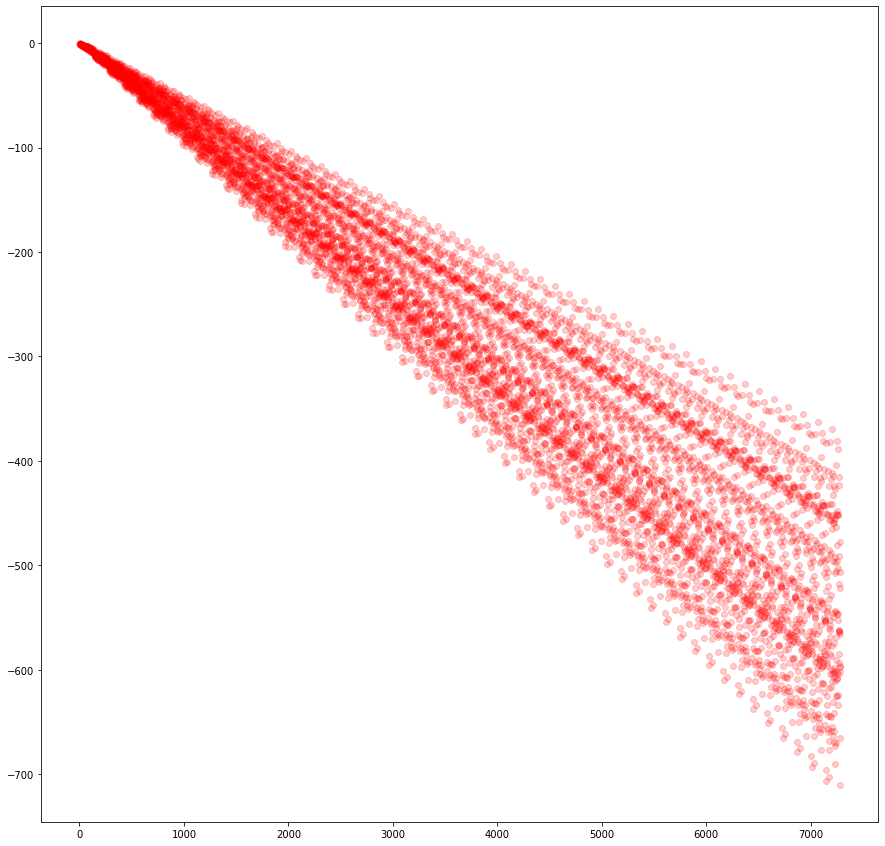

In [54]:
# weights.sort()
# plot_graph('Weights',weights)
figure = graph.figure(figsize=(15,15))
graph.scatter([i for i in range(len(weights))],weights,c = 'red',alpha = 0.2)

In [ ]:
f = sigmoids[1]
f

In [ ]:
y = Y[1]
y

In [ ]:
y*log(abs(f)) + (1-y)*log(abs(1-f))

In [ ]:
threshold = 0.5

In [ ]:
y_hat = []
for i in range(len(df_validation)):
    x = maths.matrix(df_validation.iloc[i,:-1]).T
    y_hat.append(logit(sigmoid(x,w_star))) 
df_validation['y_hat'] = y_hat
df_validation['y_hat'] = df_validation['y_hat'].apply(lambda x : 1 if x>threshold else 0) 
log_reg.create_confusion_matrix(list(df_validation['y']),list(df_validation['y_hat']))

In [ ]:
y = list(df_validation['y'])
y_hat = list(df_validation['y_hat'])

y.sort()
y_hat.sort()

figure = graph.figure(figsize=(15,15))

plot_graph('Y',y)
graph.scatter([i for i in range(len(y_hat))],y_hat,c='r',label='Predicted')
# graph.scatter([i for i in range(len(y))],y,c='b',label='Actual',alpha = 0.5,edgecolors = 'pink')


graph.legend()

In [ ]:
y_hat = []
for i in range(len(df_test)):
    x = maths.matrix(df_test.iloc[i,:-1]).T
    y_hat.append(logit(sigmoid(x,w_star))) 
df_test['y_hat'] = y_hat
df_test['y_hat'] = df_test['y_hat'].apply(lambda x : 1 if x>threshold else 0) 
log_reg.create_confusion_matrix(list(df_test['y']),list(df_test['y_hat']))

In [ ]:
y = list(df_test['y'])
y_hat = list(df_test['y_hat'])

y.sort()
y_hat.sort()

plot_graph('Y',y)
graph.scatter([i for i in range(len(y_hat))],y_hat,c='r',label='Predicted')
graph.legend()